## **7PAM2015-0509-2024 -- Research Methods in Data Science**
### Group Kaggle Challenge on Spaceship Titanic -- Assignment-3
##### Spaceship Titanic Challenge link can be found [here](https://www.kaggle.com/competitions/spaceship-titanic/overview).
Data Columns description:

    PassengerId - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.
    HomePlanet - The planet the passenger departed from, typically their planet of permanent residence.
    CryoSleep - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.
    Cabin - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.
    Destination - The planet the passenger will be debarking to.
    Age - The age of the passenger.
    VIP - Whether the passenger has paid for special VIP service during the voyage.
    RoomService, FoodCourt, ShoppingMall, Spa, VRDeck - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.
    Name - The first and last names of the passenger.
    Transported - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.
---
**Group-3**

- **Mohit Agarwal                 (Student ID-22031257)**
- **Jerome Paulraj                (Student ID-22074395)**
- **Omkar Shashikant Sawant       (Student ID-22080770)**
- **somy Nellikkunnel Thomas      (Student ID-22079522)**
- **Chandra Shekar Losirlu        (Student ID-22081216)**
- **Hari Bahadur Gharti Magar     (Student ID-22075765)**
- **Yogesh Pandit                 (Student ID-22095146)**

In [1]:
# libraries import
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import warnings
warnings.filterwarnings("ignore")

In [2]:
# setting style
sns.set_style("darkgrid")
# setting context
sns.set_context("paper")
# setting palette
sns.set_palette("deep", color_codes=True)

In [3]:
# note: change the paths
# data path
data_path = r"D:\MScDataScience\9.Research_Methods\Assignment\Assignment3\Spaceship_Titanic\Data"
# image save path
image_save_path = r"D:\MScDataScience\9.Research_Methods\Assignment\Assignment3\Spaceship_Titanic\Images"

Reading Data

In [4]:
# reading the trian and test data
train_data = pd.read_csv(os.path.join(data_path, "train.csv"))
test_data = pd.read_csv(os.path.join(data_path, "test.csv"))

### Functions

Function to Calculate the Missingess

In [5]:
def missing_data(df, plot=False, title="Number of Missing Data"):
    """
    Generate a summary of missing values in the DataFrame and optionally plot them.

    Computes the count and percentage of missing values for each column in the given
    DataFrame. If requested, it also generates and saves a horizontal bar plot of the
    missing value distribution.

    Args:
        df (pandas.DataFrame): Input DataFrame to analyze for missing values.
        plot (bool): Whether to generate a bar plot of missing value counts. Default False.
        title (str): Title for the plot if plotting is enabled. Default "Number of Missing Data".

    Raises:
        ValueError: If `df` is not a valid pandas DataFrame.

    Note:
        To save plots, ensure a global variable `image_save_path` exists and points to
        a valid directory.
    """

    # validate input type
    if not isinstance(df, pd.DataFrame):
        raise ValueError("Input must be a pandas DataFrame.")

    # combine missing value counts and percentages into a summary DataFrame
    missing_df = pd.concat([df.isna().sum(),
                            np.round(df.isna().mean()*100, 2)],  # type: ignore
                           axis=1,
                           # type: ignore
                           keys=["MissingCount", "MissingPercentage"])

    if plot:
        # create horizontal bar plot of missing counts
        missing_df["MissingCount"].plot(
            kind="barh",
            figsize=(10, 6))

        # format plot with bold title and grid
        plt.title(title, fontsize=12, fontweight="bold")
        plt.xlabel("Missing Counts", fontweight="bold")
        plt.ylabel("Columns", fontweight="bold")
        plt.grid(axis='x', linestyle='--', alpha=0.7)
        plt.tight_layout()

        # save plot image if image_save_path exists in global scope
        if "image_save_path" in globals():
            plt.savefig(os.path.join(image_save_path,
                        f"{title}.png"), bbox_inches="tight")

        # display the plot
        plt.show()

    # print missing value summary table
    print(missing_df)

Function to Visualise the Missingess

In [6]:
def missing_data_visualisation(df, title="Training"):
    """
    Visualize missing data patterns in the DataFrame using missingno.

    Generates and saves three common missing data plots:
    1. Matrix visualization showing locations and patterns of missing values.
    2. Nullity correlation heatmap indicating correlation between missingness in columns.
    3. Dendrogram clustering columns by similarity of missing data patterns.

    Args:
        df (pandas.DataFrame): DataFrame to analyze for missing data.
        title (str): Title to use in plot titles and filenames. Default is "Training".

    Raises:
        FileNotFoundError: If global variable `image_save_path` is not set or 
        points to invalid directory.

    Note:
        Requires a global variable `image_save_path` where plots will be saved.
        Ensure necessary imports: matplotlib.pyplot, os, missingno.
    """

    # Check if image_save_path exists globally and is valid
    if 'image_save_path' not in globals() or not os.path.isdir(image_save_path):
        raise FileNotFoundError(
            "Global variable 'image_save_path' must be set to a valid directory path."
        )

    # Matrix plot: visualizes missingness as white lines on dark background
    msno.matrix(df, figsize=(12, 8), fontsize=12)
    plt.title(f"Matrix Visualisation of Missing Data in {title} Set",
              fontsize=16, fontweight="bold")
    plt.xlabel("Columns (Features)", fontsize=12, fontweight="bold")
    plt.ylabel("Rows (Samples)", fontsize=12, fontweight="bold")
    plt.tight_layout()
    plt.savefig(os.path.join(image_save_path,
                             f"Matrix Visualisation of Missing Data in {title} Set.png"),
                bbox_inches="tight")
    plt.show()

    # Nullity heatmap: shows correlations in missingness between pairs of columns
    msno.heatmap(df, figsize=(12, 8), fontsize=12)
    plt.title(f"Nullity Correlation Heatmap {title} Set",
              fontsize=16, fontweight="bold")
    plt.xlabel("Columns (Features)", fontsize=12, fontweight="bold")
    plt.ylabel("Columns (Features)", fontsize=12, fontweight="bold")
    plt.tight_layout()
    plt.savefig(os.path.join(image_save_path,
                             f"Nullity Correlation Heatmap {title} Set.png"), bbox_inches="tight")
    plt.show()

    # Dendrogram: hierarchical clustering of columns based on missingness pattern similarity
    msno.dendrogram(df, figsize=(12, 8), fontsize=12)
    plt.title(f"Dendrogram of Nullity Clusters for {title} Set",
              fontsize=18, fontweight='bold')
    plt.tight_layout()
    plt.savefig(os.path.join(image_save_path,
                             f"Dendrogram of Nullity Clusters for {title} Set.png"), bbox_inches="tight")
    plt.show()

### Basic Infomation on Datasets

In [7]:
# looking at the shape of the datas
print(
    f"[INFO] Train Data Shape: {train_data.shape[0]} rows x {train_data.shape[1]} columns")
print(
    f"[INFO] Test Data Shape: {test_data.shape[0]} rows x {test_data.shape[1]} columns")

[INFO] Train Data Shape: 8693 rows x 14 columns
[INFO] Test Data Shape: 4277 rows x 13 columns


#### Train Dataset

In [8]:
# column type information -- trian
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [9]:
# describing the train data for all the columns
train_data.describe(include="all")

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
count,8693,8492,8476,8494,8511,8514.000000,8490,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000,8493,8693
unique,8693,3,2,6560,3,NaN,2,NaN,NaN,NaN,NaN,NaN,8473,2
top,9280_02,Earth,False,G/734/S,TRAPPIST-1e,NaN,False,NaN,NaN,NaN,NaN,NaN,Anton Woody,True
freq,1,4602,5439,8,5915,NaN,8291,NaN,NaN,NaN,NaN,NaN,2,4378
mean,NaN,NaN,NaN,NaN,NaN,28.827930,NaN,224.687617,458.077203,173.729169,311.138778,304.854791,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,14.489021,NaN,666.717663,1611.489240,604.696458,1136.705535,1145.717189,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,19.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,27.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,38.000000,NaN,47.000000,76.000000,27.000000,59.000000,46.000000,NaN,NaN


In [10]:
# describing the train data for the object columns
train_data.describe(include="object").round().T  # type: ignore

,count,unique,top,freq
PassengerId,8693,8693,9280_02,1
HomePlanet,8492,3,Earth,4602
CryoSleep,8476,2,False,5439
Cabin,8494,6560,G/734/S,8
Destination,8511,3,TRAPPIST-1e,5915
VIP,8490,2,False,8291
Name,8493,8473,Anton Woody,2


In [11]:
# describing the train data for the numerical columns
train_data.describe().round().T

,count,mean,std,min,25%,50%,75%,max
Age,8514.0,29.0,14.0,0.0,19.0,27.0,38.0,79.0
RoomService,8512.0,225.0,667.0,0.0,0.0,0.0,47.0,14327.0
FoodCourt,8510.0,458.0,1611.0,0.0,0.0,0.0,76.0,29813.0
ShoppingMall,8485.0,174.0,605.0,0.0,0.0,0.0,27.0,23492.0
Spa,8510.0,311.0,1137.0,0.0,0.0,0.0,59.0,22408.0
VRDeck,8505.0,305.0,1146.0,0.0,0.0,0.0,46.0,24133.0


In [12]:
# looking at the data -- train
train_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [13]:
# looking at the missing values in train
missing_data(train_data)

              MissingCount  MissingPercentage
PassengerId              0               0.00
HomePlanet             201               2.31
CryoSleep              217               2.50
Cabin                  199               2.29
Destination            182               2.09
Age                    179               2.06
VIP                    203               2.34
RoomService            181               2.08
FoodCourt              183               2.11
ShoppingMall           208               2.39
Spa                    183               2.11
VRDeck                 188               2.16
Name                   200               2.30
Transported              0               0.00


#### Test Dataset

In [14]:
# column type information -- test
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB


In [15]:
# describing the train data for all the columns
test_data.describe(include="all")

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
count,4277,4190,4184,4177,4185,4186.000000,4184,4195.000000,4171.000000,4179.000000,4176.000000,4197.000000,4183
unique,4277,3,2,3265,3,NaN,2,NaN,NaN,NaN,NaN,NaN,4176
top,9277_01,Earth,False,G/160/P,TRAPPIST-1e,NaN,False,NaN,NaN,NaN,NaN,NaN,Lyney Sellahaney
freq,1,2263,2640,8,2956,NaN,4110,NaN,NaN,NaN,NaN,NaN,2
mean,NaN,NaN,NaN,NaN,NaN,28.658146,NaN,219.266269,439.484296,177.295525,303.052443,310.710031,NaN
std,NaN,NaN,NaN,NaN,NaN,14.179072,NaN,607.011289,1527.663045,560.821123,1117.186015,1246.994742,NaN
min,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,19.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,26.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,37.000000,NaN,53.000000,78.000000,33.000000,50.000000,36.000000,NaN


In [16]:
# describing the train data for the object columns
test_data.describe(include="object").round().T  # type: ignore

,count,unique,top,freq
PassengerId,4277,4277,9277_01,1
HomePlanet,4190,3,Earth,2263
CryoSleep,4184,2,False,2640
Cabin,4177,3265,G/160/P,8
Destination,4185,3,TRAPPIST-1e,2956
VIP,4184,2,False,4110
Name,4183,4176,Lyney Sellahaney,2


In [17]:
# describing the test data for the numerical columns
test_data.describe().round().T

,count,mean,std,min,25%,50%,75%,max
Age,4186.0,29.0,14.0,0.0,19.0,26.0,37.0,79.0
RoomService,4195.0,219.0,607.0,0.0,0.0,0.0,53.0,11567.0
FoodCourt,4171.0,439.0,1528.0,0.0,0.0,0.0,78.0,25273.0
ShoppingMall,4179.0,177.0,561.0,0.0,0.0,0.0,33.0,8292.0
Spa,4176.0,303.0,1117.0,0.0,0.0,0.0,50.0,19844.0
VRDeck,4197.0,311.0,1247.0,0.0,0.0,0.0,36.0,22272.0


In [18]:
# looking at the data -- test
test_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [19]:
# looking at the missing values in test
missing_data(test_data)

              MissingCount  MissingPercentage
PassengerId              0               0.00
HomePlanet              87               2.03
CryoSleep               93               2.17
Cabin                  100               2.34
Destination             92               2.15
Age                     91               2.13
VIP                     93               2.17
RoomService             82               1.92
FoodCourt              106               2.48
ShoppingMall            98               2.29
Spa                    101               2.36
VRDeck                  80               1.87
Name                    94               2.20


### Exploratory Data Analysis

#### Missing Values Visualisation

##### Train Dataset

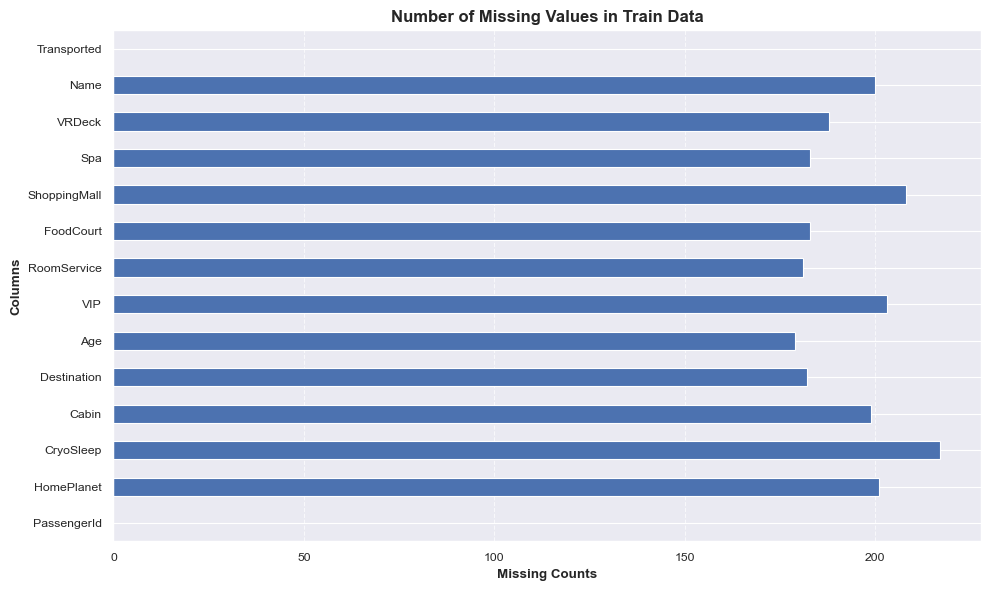

              MissingCount  MissingPercentage
PassengerId              0               0.00
HomePlanet             201               2.31
CryoSleep              217               2.50
Cabin                  199               2.29
Destination            182               2.09
Age                    179               2.06
VIP                    203               2.34
RoomService            181               2.08
FoodCourt              183               2.11
ShoppingMall           208               2.39
Spa                    183               2.11
VRDeck                 188               2.16
Name                   200               2.30
Transported              0               0.00


In [20]:
# missing values on train data
missing_data(train_data, plot=True,
             title="Number of Missing Values in Train Data")

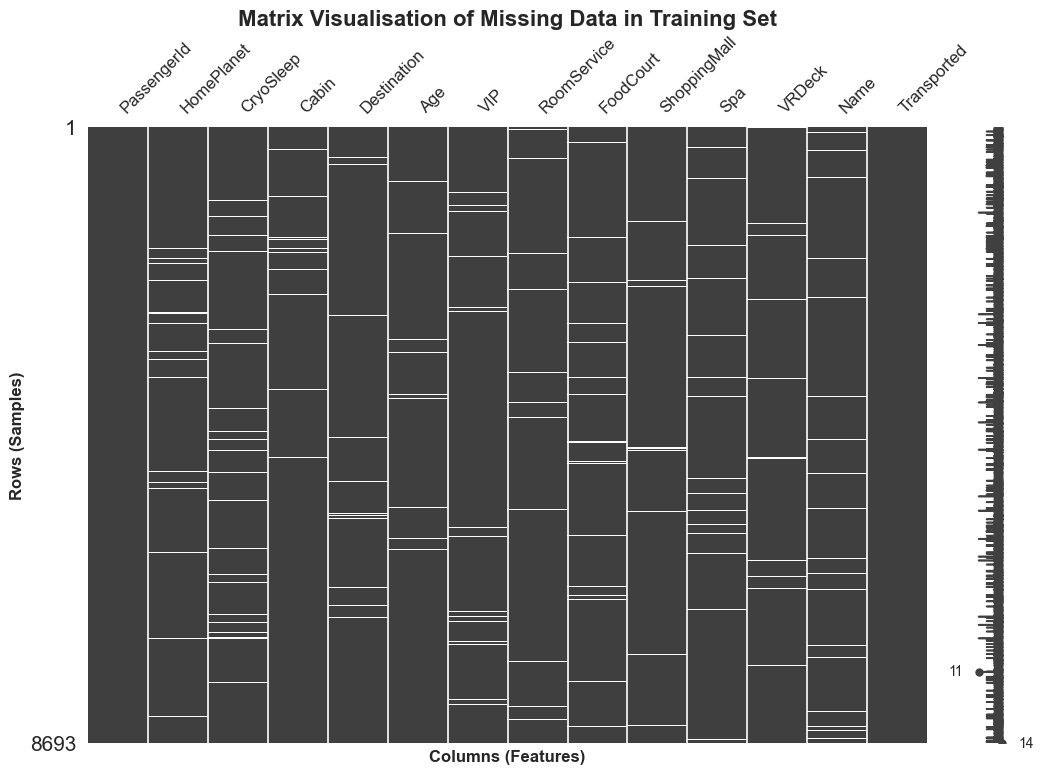

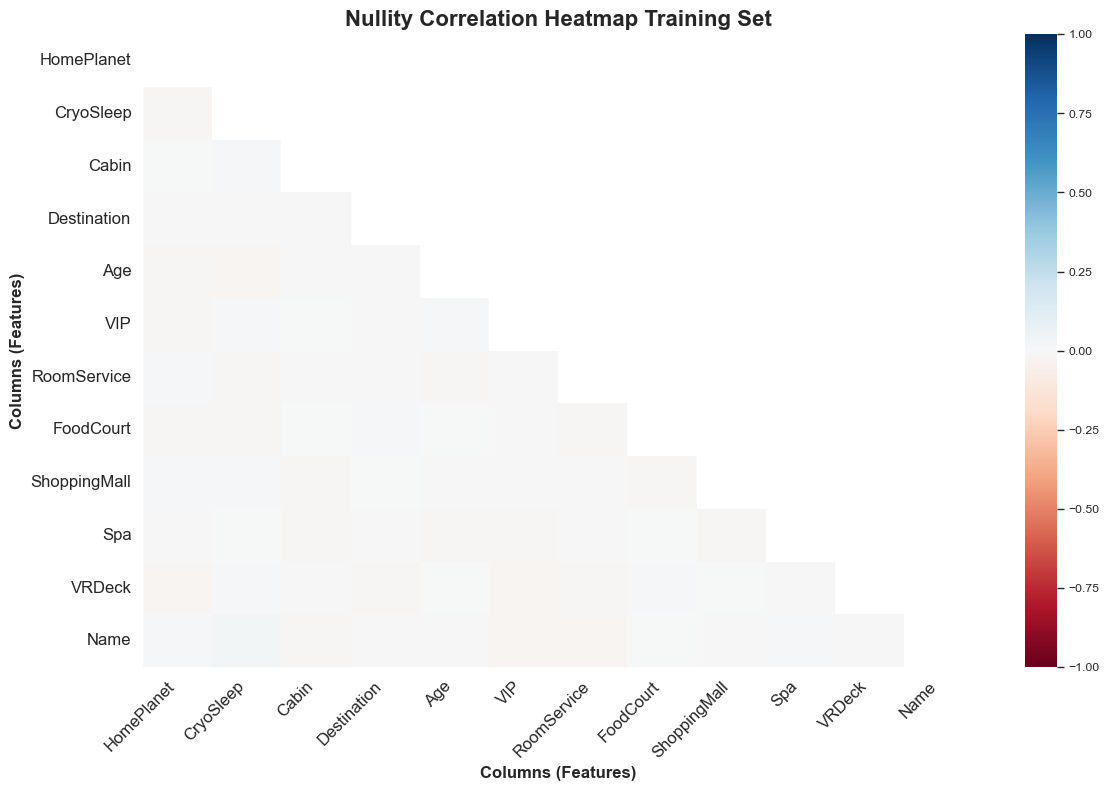

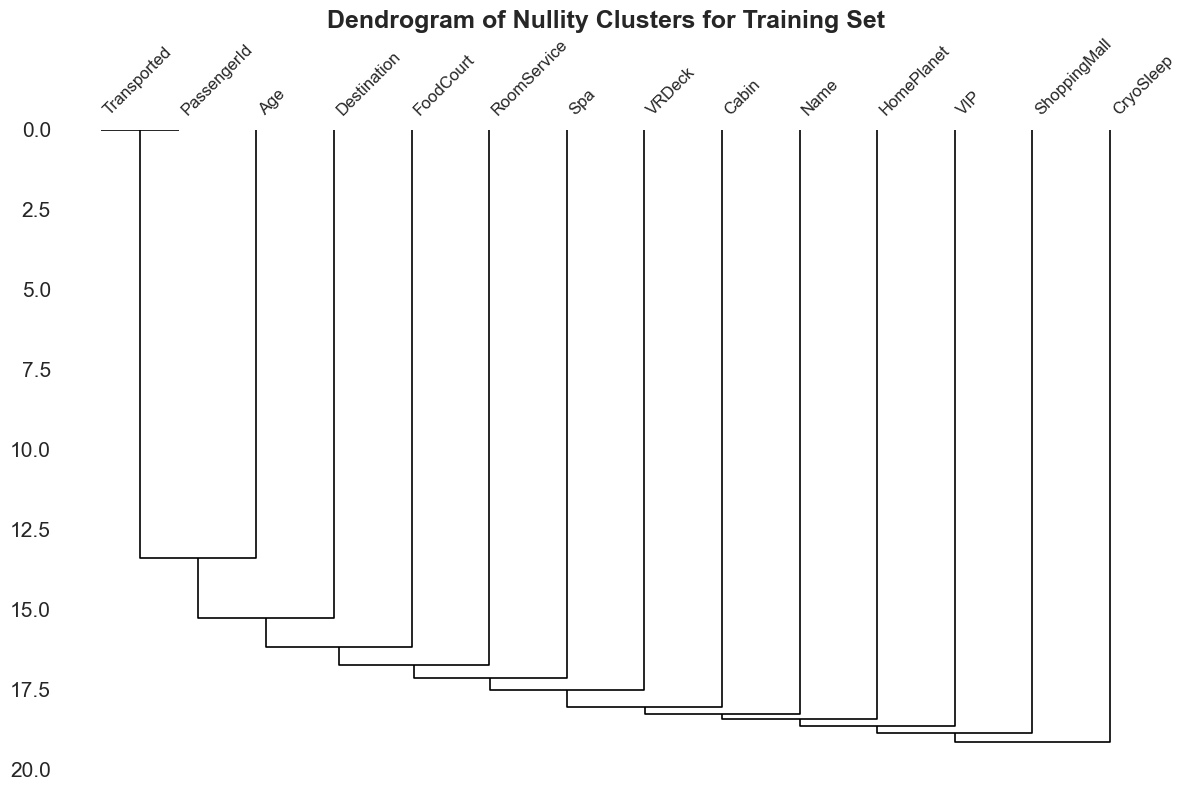

In [21]:
# visualising the missing data
missing_data_visualisation(train_data)

**Image-1: Matrix Visualisation of Missing Data in Training Set**
- **Systematic missingness:** Several features show consistent missing data patterns across rows
- Age appears to have substantial missing values
- CryoSleep and Cabin also show notable gaps
- The white lines indicate missing values, and their patterns suggest the missingness might not be completely random

**Image-2: Nullity Correlation Heatmap Training Set**
- Very weak correlations overall - most values appear close to 0 (light colors)
- No strong positive or negative correlations between features
- This suggests the features are largely independent, which could be good for modeling but might indicate limited predictive relationships
- The uniform light coloring indicates need for feature engineering to create more meaningful relationships

**Image-3: Dendrogram of Nullity Clusters for Training Set**
- **Left cluster:** Transported, PassengerId, Age, Destination - possibly demographic/booking info
- **Middle cluster:** FoodCourt, RoomService, Spa, VRDeck - clearly the amenity spending features
- **Right cluster:** Cabin, Name, HomePlanet, VIP, ShoppingMall, CryoSleep - mixed passenger characteristics

##### Test Dataset

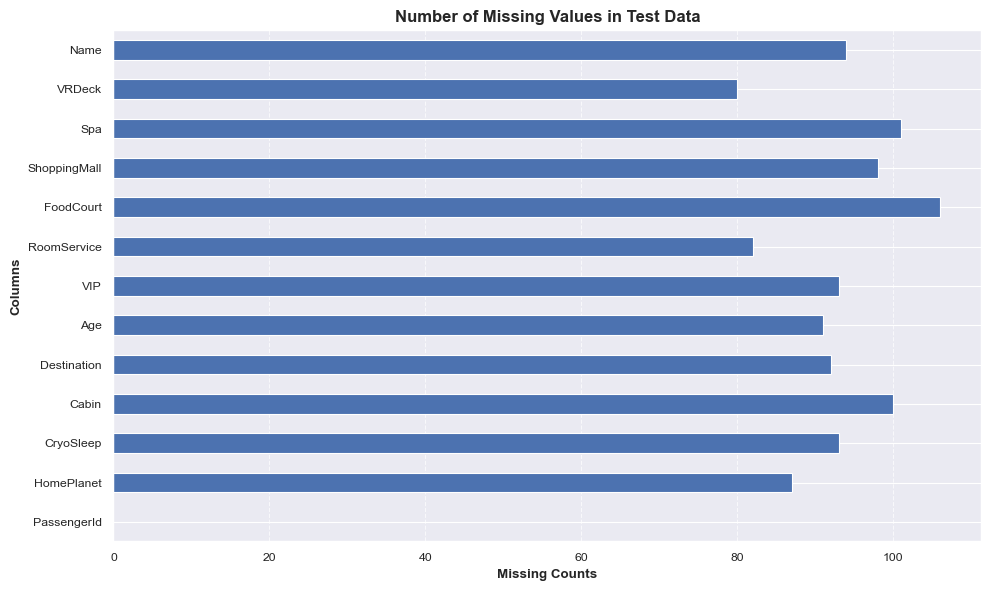

              MissingCount  MissingPercentage
PassengerId              0               0.00
HomePlanet              87               2.03
CryoSleep               93               2.17
Cabin                  100               2.34
Destination             92               2.15
Age                     91               2.13
VIP                     93               2.17
RoomService             82               1.92
FoodCourt              106               2.48
ShoppingMall            98               2.29
Spa                    101               2.36
VRDeck                  80               1.87
Name                    94               2.20


In [22]:
# missing values on train data
missing_data(test_data, plot=True,
             title="Number of Missing Values in Test Data")

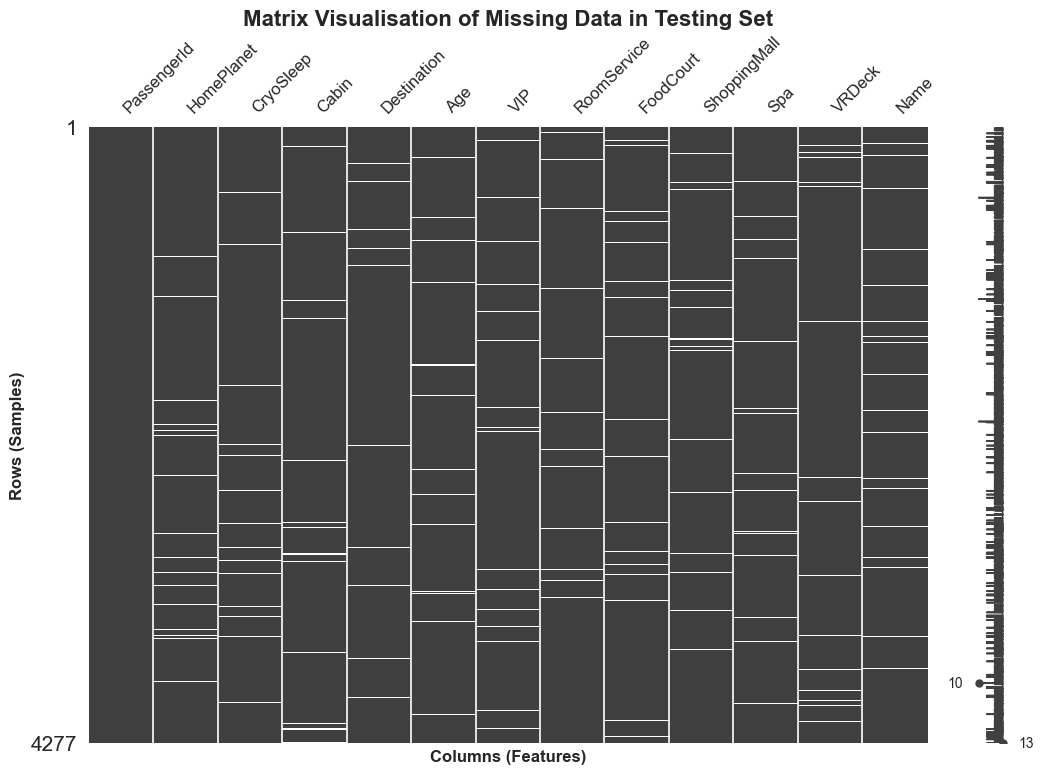

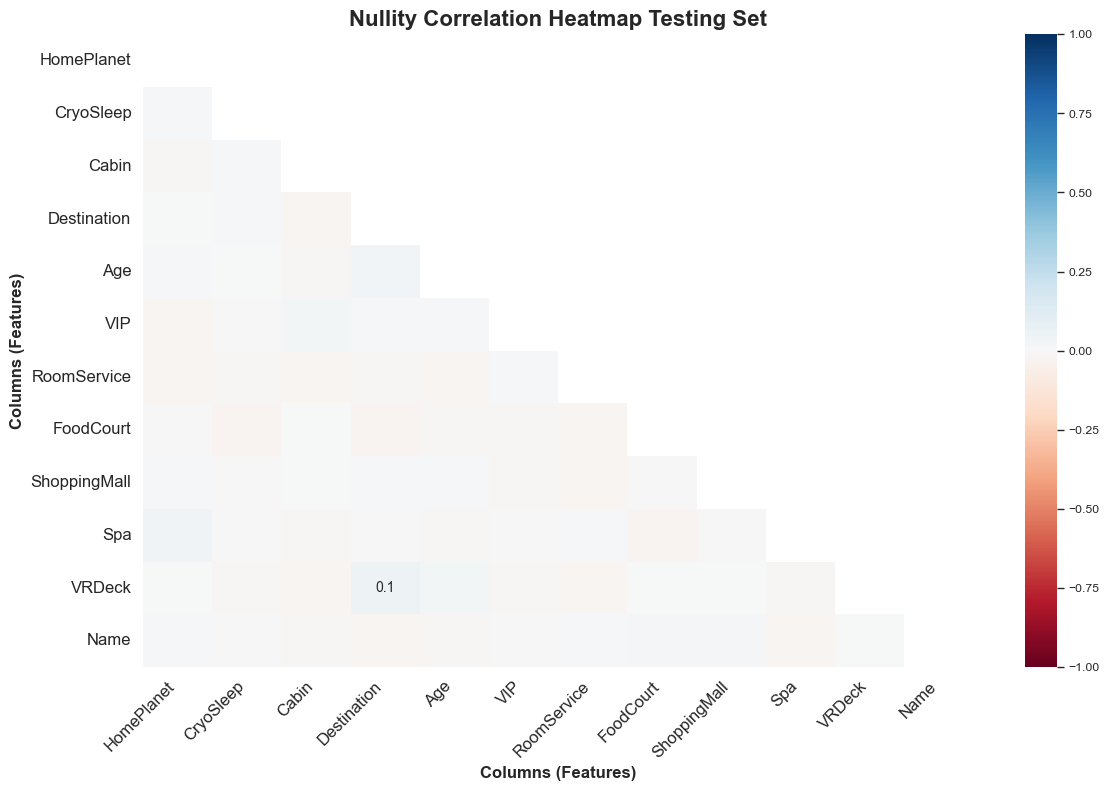

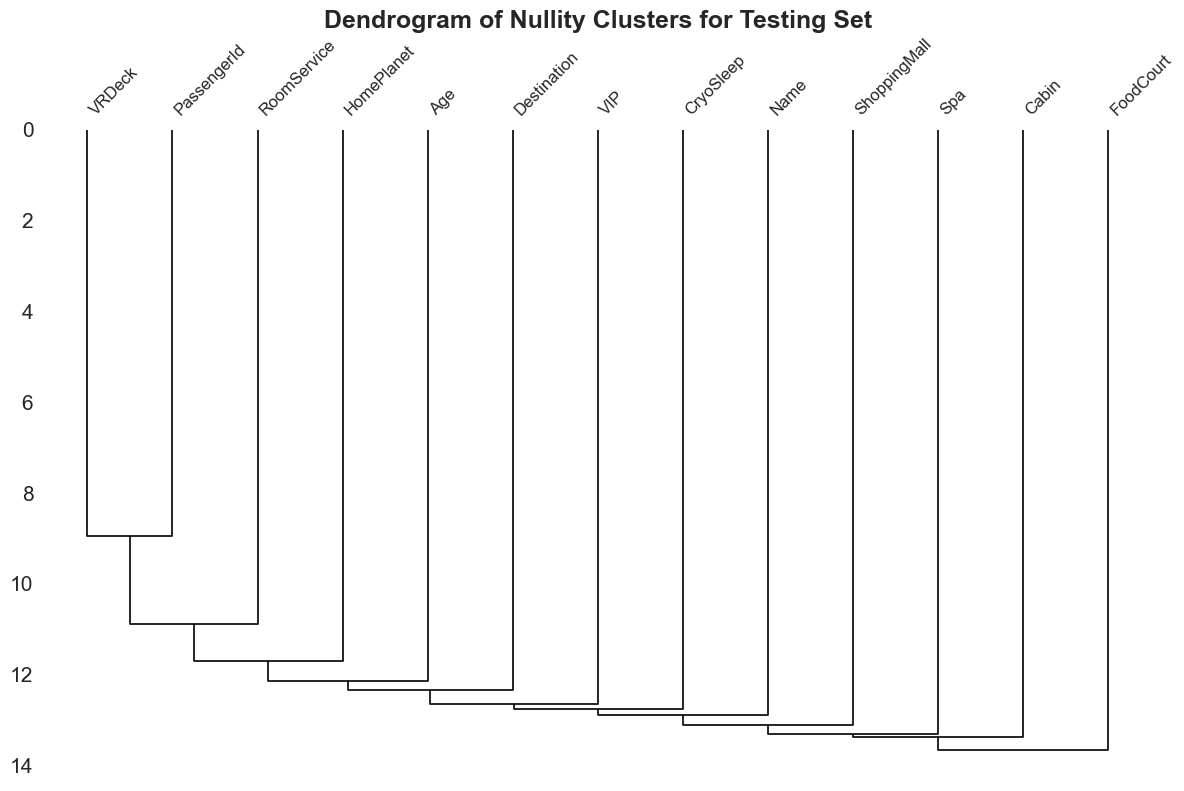

In [23]:
# visualising the missing data
missing_data_visualisation(test_data, title="Testing")

**Image-1: Matrix Visualisation of Missing Data in Testing Set**
- Overall missing data distribution appears consistent
- The missing data patterns in the test set closely mirror those in the training set, which is good for model generalization, meaning imputation strategies developed on training data should work well on test set.

**Image-2: Nullity Correlation Heatmap Testing Set**
- **Slightly stronger correlations visible:** The test set shows some slightly more pronounced relationships (though still weak overall)
- VRDeck shows a visible correlation value (0.1) with Destination - which wasn't as apparent in the training set
- Overall pattern consistency: The general weak correlation structure remains the same

**Image-3: Dendrogram of Nullity Clusters for Testing Set**
- **Different dendrogram structure:** The test set shows a completely different hierarchical clustering pattern
- **New groupings emerge:**
    - VRDeck now clusters separately at the left
    - Passenger demographic features (PassengerId, RoomService, HomePlanet, Age, Destination, VIP) form a large middle cluster
    - Amenity features (CryoSleep, Name, ShoppingMall, Spa, Cabin, FoodCourt) cluster on the right

NOTE: Models which can handle slight distribution shifts should be utilized for training, as the test and train data seems have different clustering patterns.

#### Class Balance Analysis

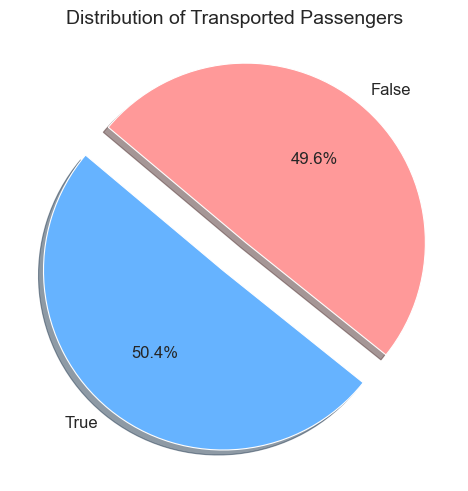

In [24]:
# Define plot style
fig, ax = plt.subplots(figsize=(5, 5))
colors = ["#66b3ff", "#ff9999"]

# Plot pie chart
train_data["Transported"].value_counts().plot.pie(
    explode=(0.1, 0.1),
    autopct='%1.1f%%',
    shadow=True,
    startangle=140,
    colors=colors,
    textprops={"fontsize": 12},
    ax=ax
)  # type: ignore

ax.set_ylabel("")
ax.set_title("Distribution of Transported Passengers", fontsize=14)
plt.tight_layout()
plt.show()

- **Nearly perfect balance:**
    - Transported -- True: 50.4%
    - Transported -- False: 49.6%
- Standard accuracy metrics are reliable - precisions, recall, and f1-score will be meaningful
- Stable model training 
- Consistent cross-validation results - balanced spilt will maintain this distribution
- **Evaluation Strategy:**
    - Standard train/validation/test splits can be used without worrying about stratification
    - ROC-AUC will be a particularly good metric given the balanced classes
    - Confusion matrices will be easily interpretable

#### Finding Patterns within the Dataset

In [25]:
train_data.select_dtypes(include=[np.number]).columns.tolist()

['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

In [26]:
# getting the numerical columns
numerical_features = train_data.select_dtypes(
    include=[np.number]).columns.tolist()
# getting the categorial columns
categorical_features = train_data.select_dtypes(
    include=['object', 'category']).columns.tolist()

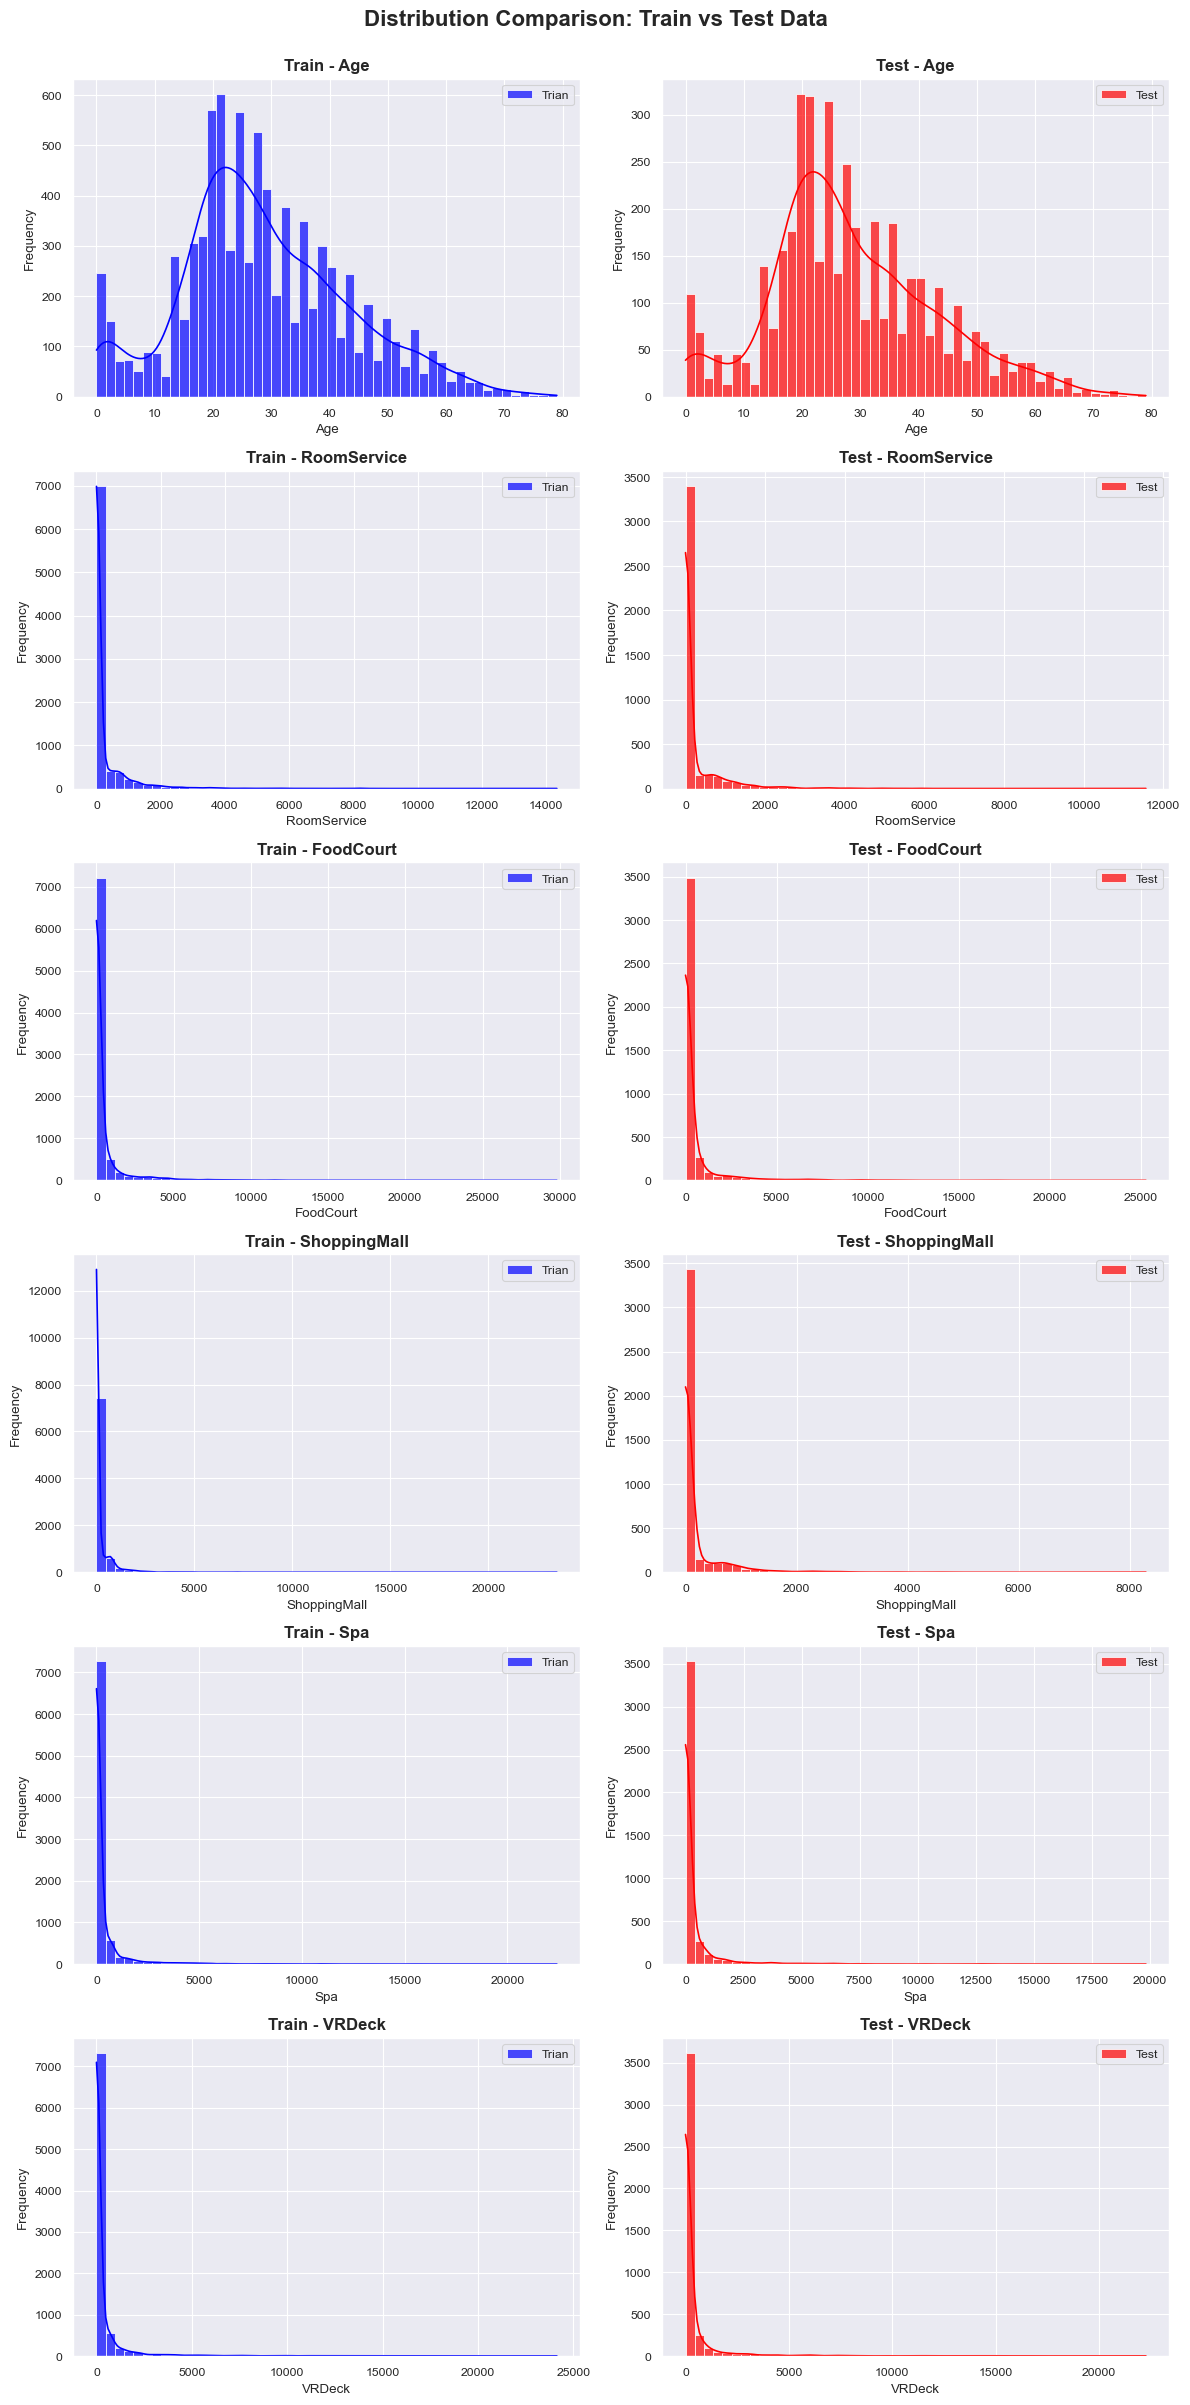

In [27]:
# Create subplots: rows = number of numerical features, 2 columns (train/test)
from email.mime import image


fig, axs = plt.subplots(len(numerical_features), 2,
                        figsize=(12, 4*len(numerical_features)))

# Loop through each numerical feature to create distribution plots
for i, col in enumerate(numerical_features):
    # Train plot (left column) - histogram with kde overlay
    sns.histplot(data=train_data, x=col, kde=True, ax=axs[i, 0],
                 color="blue", alpha=0.7, bins=50, label="Trian")
    axs[i, 0].set_title(f"Train - {col}", fontweight="bold", fontsize=12)
    axs[i, 0].set_ylabel("Frequency")
    axs[i, 0].legend()

    # Test plot (right column) - histogram with kde overlay
    sns.histplot(data=test_data, x=col, kde=True, ax=axs[i, 1],
                 color="red", alpha=0.7, bins=50, label="Test")
    axs[i, 1].set_title(f"Test - {col}", fontweight="bold", fontsize=12)
    axs[i, 1].set_ylabel("Frequency")
    axs[i, 1].legend()
# Add overall title to the figure
fig.suptitle("Distribution Comparison: Train vs Test Data",
             fontsize=16, fontweight="bold", y=1)
plt.tight_layout()
plt.savefig(os.path.join(image_save_path,
            "Distribution Comparison Train vs Test Data.png"), bbox_inches="tight")
plt.show()

### Handling Missing Values

### Precossing

### Training